In [30]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cleaned.csv",  index_col=None)

In [3]:
df.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


Al ejecutar tu análisis exploratorio, describe el número de columnas y filas que encuentras

In [4]:
print('El numero de filas es: ', df.shape[0])
print('El numero de columnas es: ', df.shape[1])

El numero de filas es:  4802
El numero de columnas es:  10


Calcula la media, máximo, mínimoy desviación estándar de las columnas con valores numéricos

In [5]:
df.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


Desarrolla el árbol de decisión utilizando la librería sklearn.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

en la X agregamos todos los datos que son de interes para las predicciones en este caso omitimos la variable track_id ya que no nos sirviria y la variable genre_top ya que es la variable a predecir
en la Y agregamos la variables que de nos interesa predecir en este caso es la variable genre_top

In [8]:
X = df.drop(['track_id', 'genre_top'], axis=1)
y = df.genre_top

dividimos los datasets en subgrupos de entrenamiento y validación para poder entrenar el modelo correctamente

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Crea una clase para ingresar variables para predicciones.

In [10]:
from pydantic import BaseModel

In [34]:
class music(BaseModel): #creamos la clase
    acousticness: float 
    danceability: float 
    energy: float 
    instrumentalness: float 
    liveness: float 
    speechiness: float 
    tempo: float 
    valence: float
    class Config:
        schema_extra = {   
            "example": { #ingresamos valores para la predeción
                "acousticness": 0.968785317, 
                "danceability": 0.3529461312, 
                "energy": 0.7443325625,
                "instrumentalness": 0.9004301244,
                "liveness": 0.3542305191,
                "speechiness": 0.4626074726,
                "tempo": 91.912,
                "valence": 0.4905165083
            }
        }

Guarda el modelo utilizando Pickle.


In [23]:
import pickle

In [35]:
Pkl_Filename = "model_tree.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(tree, file)

Crea una API con FastAPI
Carga el modelo en la API, crea un endpoint de acceso donde si la API carga muestre el mensaje “PUNTO DE ACCESO API”

importamos la libreria FastAPI

In [33]:
from fastapi import FastAPI

In [37]:
app = FastAPI() #Definimos que utilizaremos FastAPI en la variable app.

@app.on_event("startup") #Con esto creamos la orden de que la siguiente función debe correrse previo al arranque de la app.
def load_model(): #Carga el modelo
    global model
    model = pickle.load(open("model_tree.pkl", "rb"))  #Usamos pickle para deserializar, rb = read binary o lee binario.

@app.get('/') #Si se logró deserializar y entramos debería aparecer esta indicación.
def index():
    return {'PUNTO DE ACCESO API'}

#Lo siguiente da la indicación de qué es lo que el usuario debe ingresar como datos para crear una predicción. 
#Lo cual corresponde a lo que se definió en la herramienta de verificación de la API, clase.

@app.post('/predict')
def get_music_category(data: music):
    received = data.dict()
    acousticness = received['acousticness']
    danceability = received['danceability']
    energy = received['energy']
    instrumentalness = received['instrumentalness']
    liveness = received['liveness']
    speechiness = received['speechiness']
    tempo = received['tempo']
    valence = received['valence']
   #Se utilizan los datos anteriores para crear una predicción
    pred_name = model.predict([[acousticness, danceability, energy,
                                instrumentalness,  liveness, speechiness, tempo,valence]]).tolist()[0]
    return {'prediction': pred_name} #Y regresa esa predicción.

librerias para utilizar API


In [ ]:
!pip install pyngrok
!pip install ngrok
!pip install uvicorn
!pip install nest-asyncio

In [55]:
! ngrok authtoken 2DL5LdvOwndrgTQO5QliisS5YJj_6sZZnxZm44z39kZwHLo8Q

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Simula acceder a la API y captura el resultado en pantalla.

In [ ]:
from pyngrok import ngrok
import uvicorn
import nest_asyncio

#Creamos el túnel de conexión.

ngrok_tunnel = ngrok.connect(8000)

#Mostrar el URL para acceder.
print('Public URL:', ngrok_tunnel.public_url)

#Conectar la API
nest_asyncio.apply()
uvicorn.run(app, port=8000)

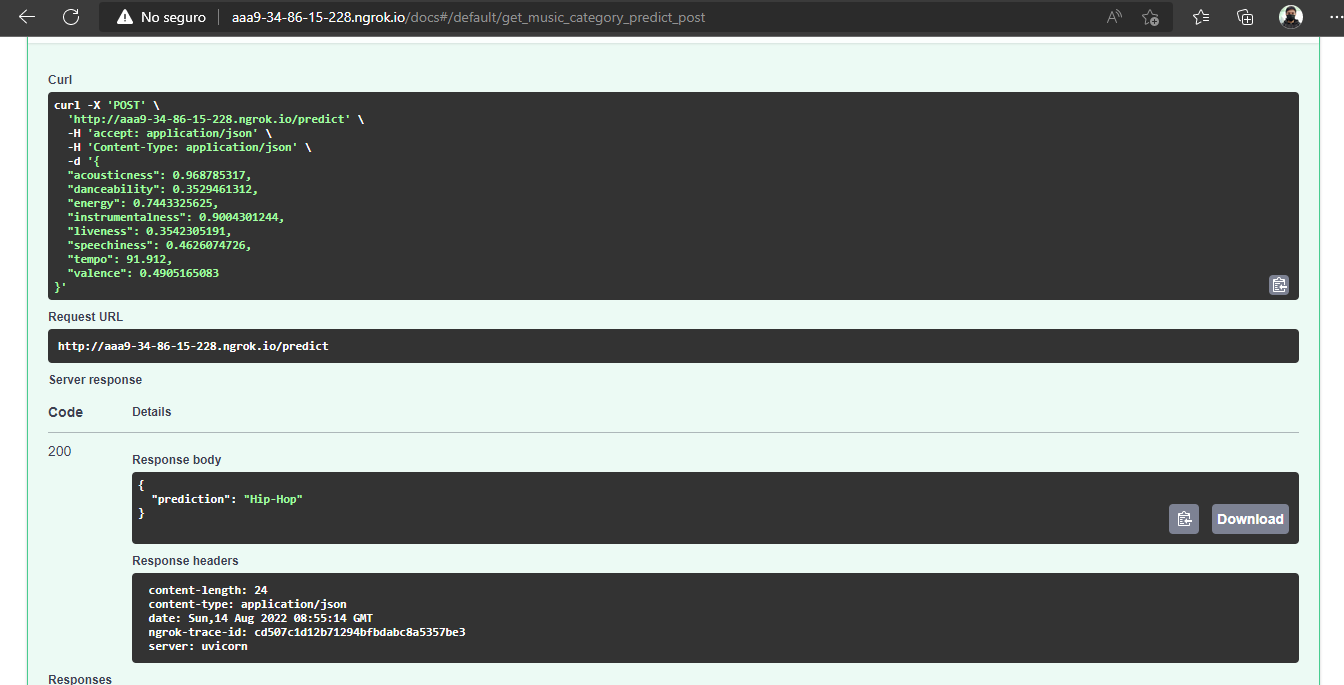

ejecutamos la siguiente funcion para cerrar la conexion con el tunnel

In [54]:
ngrok.kill()